In [1]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import DQN.agent as agent
import DQN.models as models
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [2]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

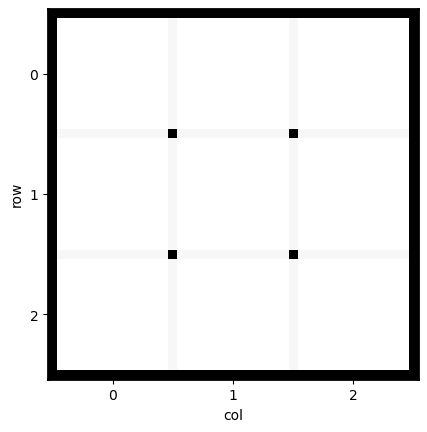

In [3]:
dataset.show_maze(0)

In [4]:
%matplotlib notebook
init_pos = {'agents': [0],
            'targets': [8]
                        }
# --- maze agent with the type of model --- #
maze_agent = agent.maze_agents(models.CNN_version1,
                               vision=3,
                               action_type='cardinal')
# --- trainer of the agent --- #
train = trainer.Maze_Training(name = 'test_limited_rewards3',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=100,
                              n_agents=1,
                              gamma = 0.99,
                              tau = 0.001,
                               batch_size = 64,
                              n_frames = 800000,
                              lr = 0.0025,
                              lr_step_size_p=0.01,
                              lr_gamma = 0.1,
                              replay_buffer_size=20000,
                              target_update=10000,
                              policy_update=1,
                              lambda_entropy=0.4,
                              beta = 0.4,
                              alpha = 0.6,
                              decay = 0.9,
                              per = True
                              )
train.train(test_agent=True,peak=False)
train.save()

<IPython.core.display.Javascript object>

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


frame 10000 with loss 9.05881404876709
cumulative reward: [9.1]
cumulative reward: [-39.75]
cumulative reward: [-21.42978719]
cumulative reward: [-21.42978719]
cumulative reward: [-21.42978719]
frame 20000 with loss 2.7803525924682617
frame 30000 with loss 8.258244514465332
cumulative reward: [-32.59488039]
cumulative reward: [-17.77978719]
cumulative reward: [-17.77978719]
cumulative reward: [-17.77978719]
cumulative reward: [-21.42978719]
frame 40000 with loss 8.529681205749512
frame 50000 with loss 4.317721366882324
cumulative reward: [-14.12978719]
cumulative reward: [9.1]
cumulative reward: [-37.2]
cumulative reward: [-19.07832541]
cumulative reward: [-17.77978719]
frame 60000 with loss 4.911917686462402
frame 70000 with loss 7.961241722106934
cumulative reward: [8.35]
cumulative reward: [-21.42978719]
cumulative reward: [-18.87978719]
cumulative reward: [10.57134752]
cumulative reward: [9.1]
frame 80000 with loss 10.277082443237305
frame 90000 with loss 5.409004211425781
cumulati

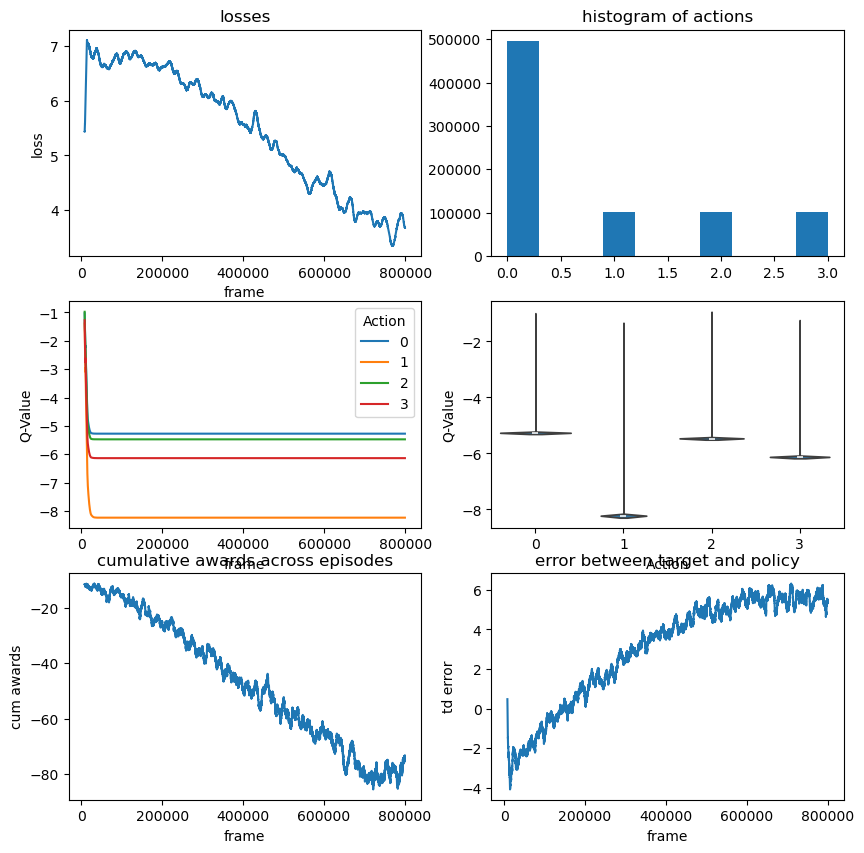

In [5]:
train.results()

In [6]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_agents=1)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


0.12

In [7]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
train.agents.run_agent(dataset[0],num_agents=1,len_game=15,epsilon=0,sample_prob=False,agents_pos=None,targets_pos=None)


cumulative reward: [9.1]


In [8]:
import DQN.agent as agent

load = agent.maze_agents.load('test1')

FileNotFoundError: [Errno 2] No such file or directory: '/home/cody/Documents/DataSciBC/Generative_AI/maze_game/trained_agents/test1/model_hyperparameters.json'

In [9]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')

In [ ]:
load.run_agent(testing_dataset[0],len_game=15,n_episodes=1,agents_pos = None, targets_pos =None)

cumulative reward: [-11.55]


<IPython.core.display.Javascript object>

KeyboardInterrupt: 